In [1]:
import sys
import os
import tempfile
import json 

import numpy as np
from process_bigraph import pp
from process_bigraph.experiments.parameter_scan import RunProcess


sys.path.insert(0, '..')


from biosimulator_processes import CORE
from biosimulator_processes.services.rest_service import BiosimulationsRestService
from biosimulator_processes.instance import generate_ode_instance, plot_ode_output_data
from biosimulator_processes.steps.ode_simulation import CopasiStep, TelluriumStep, AmiciStep
from biosimulator_processes.io import parse_expected_timecourse_config

Available processes:
[ 'console-emitter',
  'ram-emitter',
  'composite',
  'cobra',
  'copasi',
  'tellurium',
  'amici']
Available processes:
[ 'console-emitter',
  'ram-emitter',
  'composite',
  'cobra',
  'copasi',
  'tellurium',
  'amici',
  'copasi-step',
  'tellurium-step',
  'amici-step',
  'plotter',
  'plotter2d']


In [2]:
omex_dir = '../test_suite/examples/sbml-core/Caravagna-J-Theor-Biol-2010-tumor-suppressive-oscillations'

### Example A: Run single `copasi-step` using just a single omex archive dirpath as entrypoint. The Time config is inferred from the respected results file. OMEX archives provide a layer of verification prior to the simulation.

In [3]:
copasi_step = CopasiStep(archive_dirpath=omex_dir)

../test_suite/examples/sbml-core/Caravagna-J-Theor-Biol-2010-tumor-suppressive-oscillations/Caravagna2010.xml
True


In [4]:
copasi_step.outputs()

{'time': 'list[float]',
 'floating_species': {'T': 'list[float]',
  'E': 'list[float]',
  'I': 'list[float]'}}

In [5]:
copasi_result = copasi_step.update({})

running with 1.0


/Users/alex/Desktop/uchc_work/biosimulators-2.0/biosimulator-processes/demos/../biosimulator_processes/steps/ode_simulation.py:244: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [6]:
copasi_step.t.shape

(1000,)

In [7]:
len(copasi_result['floating_species']['T'])

1000

In [8]:
copasi_result['floating_species']['T']

[1.0,
 1.1974293678389192,
 1.7169187927229848,
 2.9478146326495214,
 6.060369970824804,
 14.919176887855185,
 43.97716890851662,
 155.203709023889,
 655.4645921082193,
 3302.9995889648385,
 19493.134285326545,
 120508.11354552426,
 549545.0366848384,
 1213702.3830340945,
 186618.3238281559,
 5.597037379568803,
 0.00906477340876173,
 0.0004649428436615214,
 0.00027129540618659007,
 0.0008396791584203234,
 0.008025892100134116,
 0.16428156896468726,
 5.680260880473275,
 286.1428871309716,
 18672.412399014658,
 626154.2281215906,
 138514.45054337982,
 0.036538497223410744,
 0.0004871311273802491,
 0.0014576646621440245,
 0.05553662049627786,
 7.123296253263378,
 1689.9928361148634,
 340828.03479111573,
 31456.47081495295,
 0.003139616228510263,
 0.0006852723128134656,
 0.03415059146278656,
 12.792249765823948,
 10511.61928385405,
 1189867.4863843974,
 0.042515583578409025,
 0.0005550511866414761,
 0.04238014860216408,
 45.52326348012248,
 99711.21882614467,
 2994.222509077801,
 0.0005801

TypeError: unsupported operand type(s) for +: 'int' and 'list'

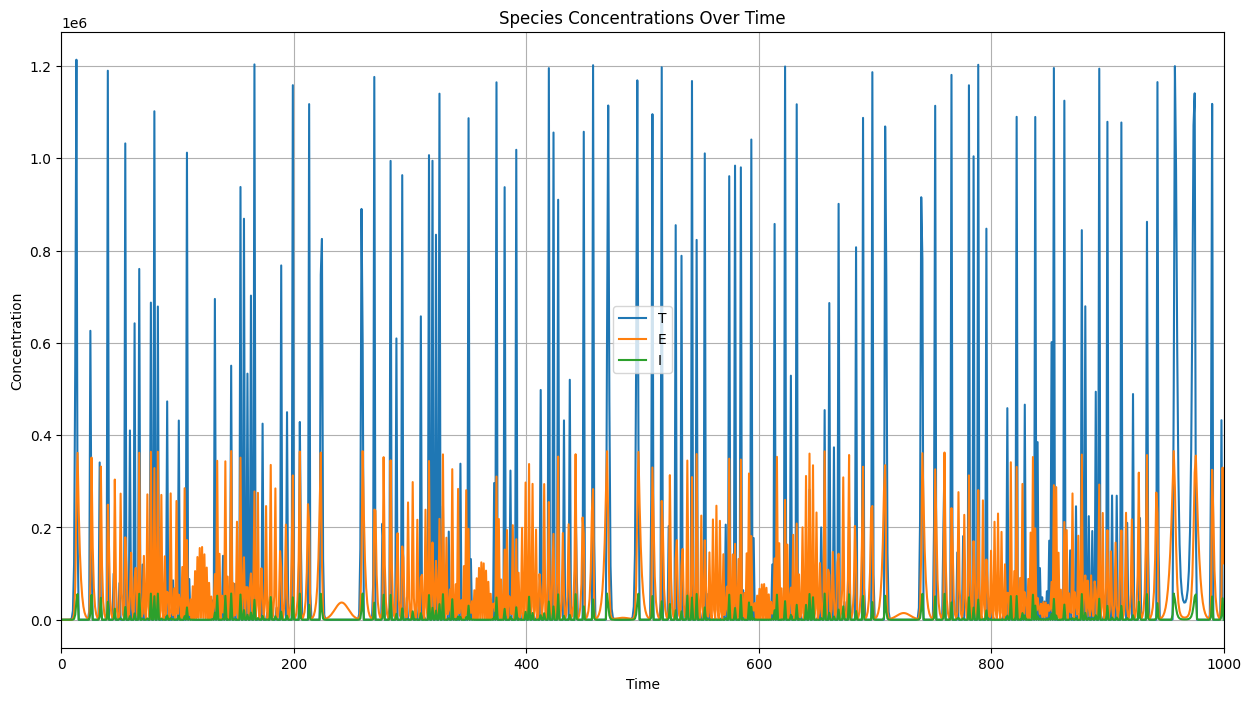

In [9]:
plot_ode_output_data(copasi_result)

### Example B: Specify an sbml model filepath and custom time configuration

In [ ]:
model_fp = os.path.join(omex_dir, 'Caravagna2010.xml')
step_size = 0.25
duration = 100.0
num_steps = 200.0

### Example C: Specify a `process_bigraph`-style `Step` configuration which adhere's to the given implementation's `config_schema`; in this case, `ODESimulation`.

In [ ]:
ode_process_config = {
    'model': {'model_source': model_fp},
    'time_config': {
        'step_size': 0.01,
        'duration': 100.0,
        'num_steps': 2000.0
    }
}